In [39]:
import numpy as np
import os
import re
from sklearn.metrics import accuracy_score
import opensmile
import matplotlib.pyplot as plt

In [40]:
## Variables Defined
path=r"D:\PRML"

train_path=os.path.join(path,"train","train")
test_path=os.path.join(path,"test","test")

In [41]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,   ## Geneva Minimalistic Acoustic Parameter Set
    feature_level=opensmile.FeatureLevel.Functionals,
)

## For Full Dataset

In [42]:
count_male=0
count_female=0

lang=[]
count_male_vect=[]
count_female_vect=[]
for folder in os.listdir(train_path):
    folder_path=os.path.join(train_path,folder)
    for file in os.listdir(folder_path):
        if(re.search("_f_",file)):
            count_female+=1
            
        elif(re.search("_m_",file)):
            count_male+=1
    count_male_vect.append(count_male)
    count_female_vect.append(count_female)
    count_female=0
    count_male=0
    lang.append(str(folder))

Female data [3780, 3780, 3780]
Male data= [3780, 3780, 3780]


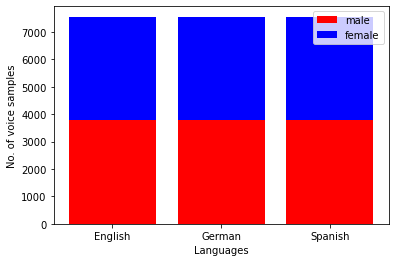

In [43]:
plt.bar(lang,count_male_vect,color='r')
plt.bar(lang,count_female_vect,bottom=count_male_vect,color='b')
print("Female data",count_female_vect)
print("Male data=",count_male_vect)

plt.legend(["male","female"])
plt.xlabel("Languages")
plt.ylabel("No. of voice samples")
plt.show()

## Training

In [ ]:
max_count=3780*2  ## No. of examples to use for training
true_values_male=[]
true_values_female=[]
count=0
count_male=0
count_female=0
features_male=[]
features_female=[]
flag_male=0
flag_female=0
lang=[]
count_male_vect=[]
count_female_vect=[]
for folder in os.listdir(train_path):
    folder_path=os.path.join(train_path,folder)
    for file in os.listdir(folder_path):
        if(count==max_count):
            break
        if(re.search("_f_",file)):
            if(count_female>=max_count/2):
                continue
            count_female+=1
            file_path=os.path.join(folder_path,file)
            y=smile.process_file(file_path)
            file_features=np.asarray(y)
            if flag_female==0:
                features_female=file_features
                flag_female=-1
            else:
                features_female=np.concatenate((features_female,file_features),axis=0)
            if(re.match("de",file)):
                true_values_female.append(0)
            elif(re.match("en",file)):
                true_values_female.append(1)
            elif(re.match("es",file)):
                true_values_female.append(2)
            count+=1
            if(count_female==max_count/2):
                print("Female for "+str(folder)+" done")

        elif(re.search("_m_",file)):
            if(count_male>=max_count/2):
                continue
            count_male+=1
            file_path=os.path.join(folder_path,file)
            y=smile.process_file(file_path)
            file_features=np.asarray(y)
            if flag_male==0:
                features_male=file_features
                flag_male=-1
            else:
                features_male=np.concatenate((features_male,file_features),axis=0)
            if(re.match("de",file)):
                true_values_male.append(0)
            elif(re.match("en",file)):
                true_values_male.append(1)
            elif(re.match("es",file)):
                true_values_male.append(2)
            count+=1
            if(count_male==max_count/2):
                print("Male for "+str(folder)+" done")
        
    
    count_male_vect.append(count_male)
    count_female_vect.append(count_female)
    count=0
    count_female=0
    count_male=0
    lang.append(str(folder))
    print(str(folder)+" Done")
true_values_male=np.array(true_values_male)   
true_values_female=np.array(true_values_female)


print("Feature Extraction Done")
        


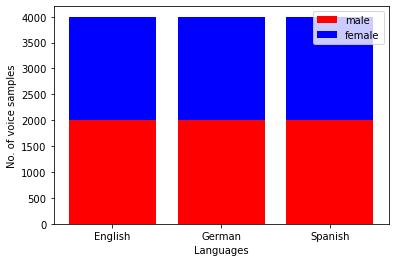

In [ ]:
plt.bar(lang,count_male_vect,color='r')
plt.bar(lang,count_female_vect,bottom=count_male_vect,color='b')
plt.legend(["male","female"])
plt.xlabel("Languages")
plt.ylabel("No. of voice samples")
plt.show()

## Testing

In [ ]:
true_values_test_male=[]
true_values_test_female=[]
test_features_male=[]
test_features_female=[]
count=0
flag_female=0
flag_male=0
lang=[]
count_male=0
count_female=0
count_male_vect=[]
count_female_vect=[]
for folder in os.listdir(test_path):
    folder_path=os.path.join(test_path,folder)
    for file in os.listdir(folder_path):
        file_path=os.path.join(folder_path,file)

        if(re.search("_f_",file)):
            count_female+=1
            y=smile.process_file(file_path)
            file_features=np.asarray(y)

            if flag_female==0:
                test_features_female=file_features
                flag_female=-1
            else:
                test_features_female=np.concatenate((test_features_female,file_features),axis=0)

            if(re.match("de",file)):
                true_values_test_female.append(0)
            elif(re.match("en",file)):
                true_values_test_female.append(1)
            elif(re.match("es",file)):
                true_values_test_female.append(2)


        elif(re.search("_m_",file)):
            count_male+=1
            y=smile.process_file(file_path)
            file_features=np.asarray(y)

            if flag_male==0:
                test_features_male=file_features
                flag_male=-1
            else:
                test_features_male=np.concatenate((test_features_male,file_features),axis=0)

            if(re.match("de",file)):
                true_values_test_male.append(0)
            elif(re.match("en",file)):
                true_values_test_male.append(1)
            elif(re.match("es",file)):
                true_values_test_male.append(2)

        
        
    count_male_vect.append(count_male)
    count_female_vect.append(count_female)
    count_female=0
    count_male=0
    lang.append(str(folder))
true_values_test_male=np.array(true_values_test_male)   
true_values_test_female=np.array(true_values_test_female)   

print("Feature Extraction Done")
        


Feature Extraction Done


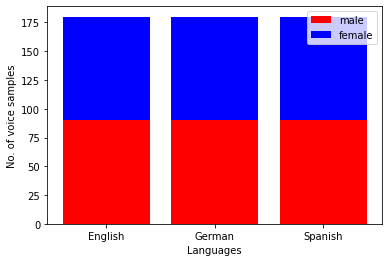

In [ ]:
plt.bar(lang,count_male_vect,color='r')
plt.bar(lang,count_female_vect,bottom=count_male_vect,color='b')
plt.legend(["male","female"])
plt.xlabel("Languages")
plt.ylabel("No. of voice samples")
plt.show()

## Getting only required Features

In [ ]:
res=np.array([24,38,58,60,68,70,76,78])
 
# 24= mfcc sma3 mean
# 38= log RelF0-H1-A3_sma3_nz_amean
# 58= AlphaRatioV_sma3_nz_amean
# 60= hammerberg index_sma3_nz_amean
# 68= mfcc1V sma3nz amean
# 70= mfcc2V sma3nz amean
# 76= alphaRatioUV_sma3_nz_amean
# 78= slopeUV0-500 sma3nz amean 

res.T
features_female=features_female[:,res]
features_male=features_male[:,res]
test_features_female=test_features_female[:,res]
test_features_male=test_features_male[:,res]

In [ ]:
# fig,ax=plt.subplots()
# ax = plt.subplot(111, projection='3d')
# ax.scatter(features[:,0],features[:,1],c=true_values)
# ax.legend(["1","0","2"])
# fig.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler


# SVM-Linear (Male)


In [ ]:
from sklearn.svm import SVC

pipe_male = Pipeline([ ('std', StandardScaler()), ('SVM', SVC(kernel='linear',probability=True))])
pipe_male.fit(features_male, true_values_male)
pred_test_male=np.array(pipe_male.predict(test_features_male))


Accuracy  on test data 0.8592592592592593


<AxesSubplot:>

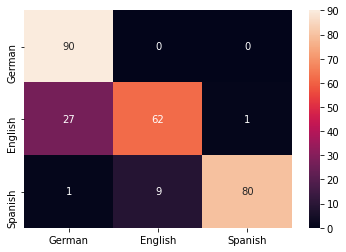

In [ ]:
score=accuracy_score(true_values_test_male, pred_test_male)
print("Accuracy  on test data",score)


from sklearn.metrics import confusion_matrix
cf=confusion_matrix(true_values_test_male,pred_test_male)

import seaborn as sb
labels=["German","English","Spanish"]
sb.heatmap(cf,annot=True,xticklabels=labels,yticklabels=labels)

## SVM- Linear Female

In [ ]:
from sklearn.svm import SVC

pipe_female = Pipeline([ ('std', StandardScaler()), ('SVM', SVC(kernel='linear',probability=True))])
pipe_female.fit(features_female, true_values_female)
pred_test_female=np.array(pipe_female.predict(test_features_female))


Accuracy  on test data 0.4962962962962963


<AxesSubplot:>

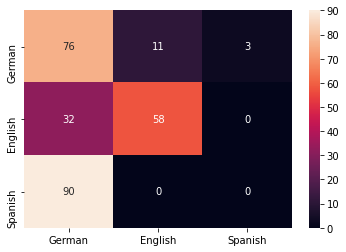

In [ ]:
score=accuracy_score(true_values_test_female, pred_test_female)
print("Accuracy  on test data",score)


from sklearn.metrics import confusion_matrix
cf=confusion_matrix(true_values_test_female,pred_test_female)

import seaborn as sb
labels=["German","English","Spanish"]
sb.heatmap(cf,annot=True,xticklabels=labels,yticklabels=labels)

## Combined

In [ ]:
x_train=np.r_[features_female,features_male]
y_train=np.r_[true_values_female,true_values_male]
x_test=np.r_[test_features_female,test_features_male]
y_test=np.r_[true_values_test_female,true_values_test_male]
pipe_combined = Pipeline([ ('std', StandardScaler()), ('SVM', SVC(kernel='linear',probability=True))])
pipe_combined.fit(x_train, y_train)
pred_test_combined=pipe_combined.predict(x_test)



Accuracy  on test data 0.7666666666666667


<AxesSubplot:>

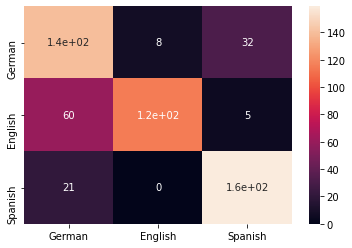

In [ ]:
score=accuracy_score(y_test, pred_test_combined)
print("Accuracy  on test data",score)


from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,pred_test_combined)

import seaborn as sb
labels=["German","English","Spanish"]
sb.heatmap(cf,annot=True,xticklabels=labels,yticklabels=labels)